#Steps

Ignore commented code

1) Put your images in a folder and enter that folder location in instance_data_dir in section train and in the section visualize before training

2) once training is over, go to output dir created and download the lora-weights

3) Upload these weights to huggingface after signing up and creating a new account. You guys can use any name. My repo is [here](https://huggingface.co/RajSang/raj_sdxl_1000_no_prior)

4) Run inference code snippets once you have completed the above steps. Change checkpoints wherever necessary. Restart kernel as directed after running the first cell in the inference section

#Installations

In [ ]:
# Install dependencies.
!pip install transformers accelerate -q
!pip install bitsandbytes>=0.40.0
!pip install -U xformers --index-url https://download.pytorch.org/whl/cu118


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 5.5 MB/s eta 0:00:00
Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 952.2 kB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.1.0+cu118
    Uninstalling torch-2.1.0+cu118:
      Successfully uninstalled torch-2.1.0+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.1.0+cu118 requires torch==2.1.0, but you have torch 2.1.1+cu118 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 2.1.1+cu118 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you have torch 2.1.1+cu118 which is incompatible.
torchvision 0.16.0+cu118 requires torch==2.1.0, but you have torch 2.

In [ ]:
!pip install git+https://github.com/huggingface/diffusers.git -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!wget https://raw.githubusercontent.com/rajlm10/dreambooth_lora_merging/main/dream_booth.py

--2023-12-08 02:22:05--  https://raw.githubusercontent.com/rajlm10/dreambooth_lora_merging/main/dream_booth.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41338 (40K) [text/plain]
Saving to: ‘dream_booth.py’

dream_booth.py      100%[===================>]  40.37K  --.-KB/s    in 0.004s  

2023-12-08 02:22:05 (11.2 MB/s) - ‘dream_booth.py’ saved [41338/41338]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image

def image_grid(imgs, rows, cols, resize=256):
    assert len(imgs) == rows * cols

    if resize is not None:
        imgs = [img.resize((resize, resize)) for img in imgs]
    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

In [ ]:
!unzip "/content/drive/My Drive/prior.zip"

Archive:  /content/drive/My Drive/prior.zip
  inflating: results/result_174.jpg  
  inflating: results/result_167.jpg  
  inflating: results/result_195.jpg  
  inflating: results/result_178.jpg  
  inflating: results/result_190.jpg  
  inflating: results/result_197.jpg  
  inflating: results/result_176.jpg  
  inflating: results/result_185.jpg  
  inflating: results/result_183.jpg  
  inflating: results/result_186.jpg  
  inflating: results/result_166.jpg  
  inflating: results/result_160.jpg  
  inflating: results/result_181.jpg  
  inflating: results/result_169.jpg  
  inflating: results/result_187.jpg  
  inflating: results/result_191.jpg  
  inflating: results/result_172.jpg  
  inflating: results/result_180.jpg  
  inflating: results/result_171.jpg  
  inflating: results/result_198.jpg  
  inflating: results/result_188.jpg  
  inflating: results/result_196.jpg  
  inflating: results/result_170.jpg  
  inflating: results/result_193.jpg  
  inflating: results/result_189.jpg  
  infl

#Visualize before training

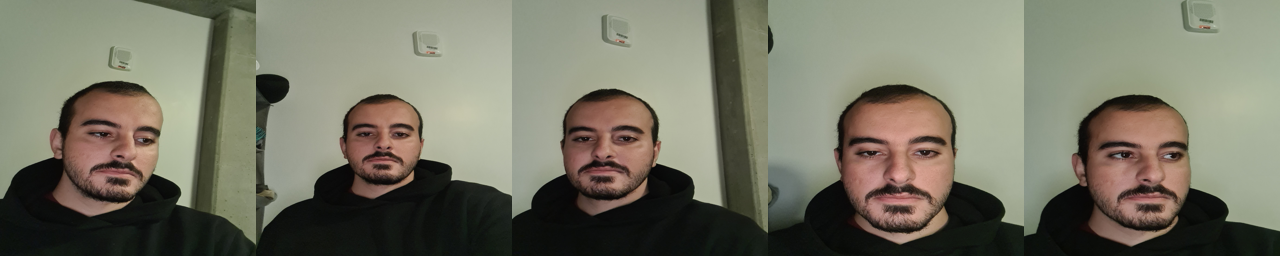

In [ ]:
import glob

imgs = [Image.open(path) for path in glob.glob("/content/drive/My Drive/Karim_JPEG/*.jpeg")]
image_grid(imgs, 1, 5)

#Train

In [ ]:
#!accelerate config
!accelerate config default


accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [ ]:
import os

os.listdir('/content/drive/My Drive/Karim_JPEG'),len(os.listdir('./results'))

(['20231126_000513.jpeg',
  '20231126_000342.jpeg',
  '20231126_000308.jpeg',
  '20231126_000221.jpeg',
  '20231126_240.jpeg'],
 197)

##Without Prior Preservation

In [ ]:
#!/usr/bin/env bash
!accelerate launch train_dreambooth_lora_sdxl.py \
  --pretrained_model_name_or_path="stabilityai/stable-diffusion-xl-base-1.0" \
  --pretrained_vae_model_name_or_path="madebyollin/sdxl-vae-fp16-fix" \
  --instance_data_dir="/content/drive/My Drive/Karim_JPEG/" \
  --output_dir="/content/drive/My Drive/sdxl-karim-no_prior-1000" \
  --mixed_precision="fp16" \
  --instance_prompt="a photo of karim person" \
  --resolution=1024 \
  --train_batch_size=2 \
  --gradient_accumulation_steps=2 \
  --gradient_checkpointing \
  --learning_rate=6e-5 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --use_8bit_adam \
  --max_train_steps=1000\
  #--resume_from_checkpoint="/content/sdxl-raj-no_prior-1000/checkpoint-500"


2023-11-26 08:22:54.253638: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-26 08:22:54.253696: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-26 08:22:54.253747: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-26 08:22:55.899720: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
11/26/2023 08:22:57 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: fp16

tokenizer/tokenizer_config.json: 100% 737/737 [00:00<00:00, 4.23MB/s]
t

##With Prior Preservation

In [ ]:
#!/usr/bin/env bash
!accelerate launch dream_booth.py \
  --pretrained_model_name_or_path="stabilityai/stable-diffusion-xl-base-1.0" \
  --pretrained_vae_model_name_or_path="madebyollin/sdxl-vae-fp16-fix" \
  --instance_data_dir="/content/drive/My Drive/Karim_JPEG/" \
  --class_data_dir="results" \
  --output_dir="/content/drive/My Drive/sdxl-karim-1000" \
  --mixed_precision="fp16" \
  --instance_prompt="a photo of karim person" \
  --resolution=1024 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=2 \
  --gradient_checkpointing \
  --learning_rate=6e-5 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --use_8bit_adam \
  --max_train_steps=1000\
  --with_prior_preservation --prior_loss_weight=1.0\
  --class_prompt="a photo of person"\
  --num_class_images=197

2023-12-08 02:30:28.728879: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-08 02:30:28.728937: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-08 02:30:28.728991: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-08 02:30:29.861419: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
12/08/2023 02:30:30 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: fp16

tokenizer/tokenizer_config.json: 100% 737/737 [00:00<00:00, 3.64MB/s]
t

In [ ]:
import gc
import torch

def flush():
  gc.collect()
  torch.cuda.empty_cache()
  torch.cuda.reset_peak_memory_stats()

flush()